In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import requests
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/Soil Moisture, Air Temperature and humidity, and Water Motor onoff Monitor data.AmritpalKaur.csv")

In [ ]:
data.head(5)

,Soil Moisture,Temperature,Air Humidity,Pump Data
0,683.802906,29.184908,71.789699,0
1,408.571567,33.707205,77.977391,1
2,659.092074,24.760311,60.776282,1
3,842.929764,32.738515,59.323543,0
4,414.199320,25.692744,66.624914,1


In [ ]:
data.shape

(3000, 4)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Soil Moisture  3000 non-null   float64
 1   Temperature    3000 non-null   float64
 2   Air Humidity   3000 non-null   float64
 3   Pump Data      3000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 93.9 KB
None


No null value we cam directly work with data


In [ ]:
print(data.describe())

       Soil Moisture  Temperature  Air Humidity    Pump Data
count    3000.000000  3000.000000   3000.000000  3000.000000
mean      662.419754    28.443043     59.387209     0.523000
std       187.936297     6.018565     12.428161     0.499554
min       314.511016    18.002132     38.000201     0.000000
25%       501.362575    23.320750     48.661993     0.000000
50%       666.578554    28.361854     58.975423     1.000000
75%       821.867423    33.595989     70.138397     1.000000
max       984.828010    38.992770     81.267407     1.000000


Check for negative or unrealistic values

1-Dry (Low Moisture):
  Moisture Level: 0 to 300
•	Soil is dry and may appear cracked.
•	Plants may show signs of wilting.
•	Irrigation is usually required.

2-Moderate (Optimal Moisture):
•	Moisture Level: 300 to 600
•	Description:
o	Soil feels damp but not saturated.
o	Ideal condition for most crops.
o	No immediate need for irrigation.

Wet (High Moisture):
•	Moisture Level: 600 to 1000+
•	Description:
o	Soil is wet or saturated.
o	Risk of over-irrigation or waterlogging.
o	Plants might suffer from root rot if this continues.


In [ ]:
for col in [ 'Soil Moisture', 'Temperature', 'Air Humidity'  ]:
    if any(data[col] < 0):
        print(f"Warning: Negative values found in {col}. Replacing with NaN.")
        data[col] = data[col].apply(lambda x: np.nan if x < 0 else x)

print("Preview of the dataset after cleaning:")
print(data.head(4))

Preview of the dataset after cleaning:
   Soil Moisture  Temperature  Air Humidity  Pump Data
0     683.802906    29.184908     71.789699          0
1     408.571567    33.707205     77.977391          1
2     659.092074    24.760311     60.776282          1
3     842.929764    32.738515     59.323543          0


In [ ]:


data = data.rename(columns={'Pump Data': 'Irrigation Need'})
print(data.head())

   Soil Moisture  Temperature  Air Humidity  Irrigation Need
0     683.802906    29.184908     71.789699                0
1     408.571567    33.707205     77.977391                1
2     659.092074    24.760311     60.776282                1
3     842.929764    32.738515     59.323543                0
4     414.199320    25.692744     66.624914                1


In [ ]:
irrigation_counts = data['Irrigation Need'].value_counts()
irrigation_counts

,count
Irrigation Need,
1,1569
0,1431


Ok now we have final dataset and all importtant features related to our model so we will make model based on these features


[ ]


First we make the copy of our dataset because i dont want to mess with mmy original dataset now we will do encoding first do simple encoding and check accuracy and also do one-hot encoding then check results

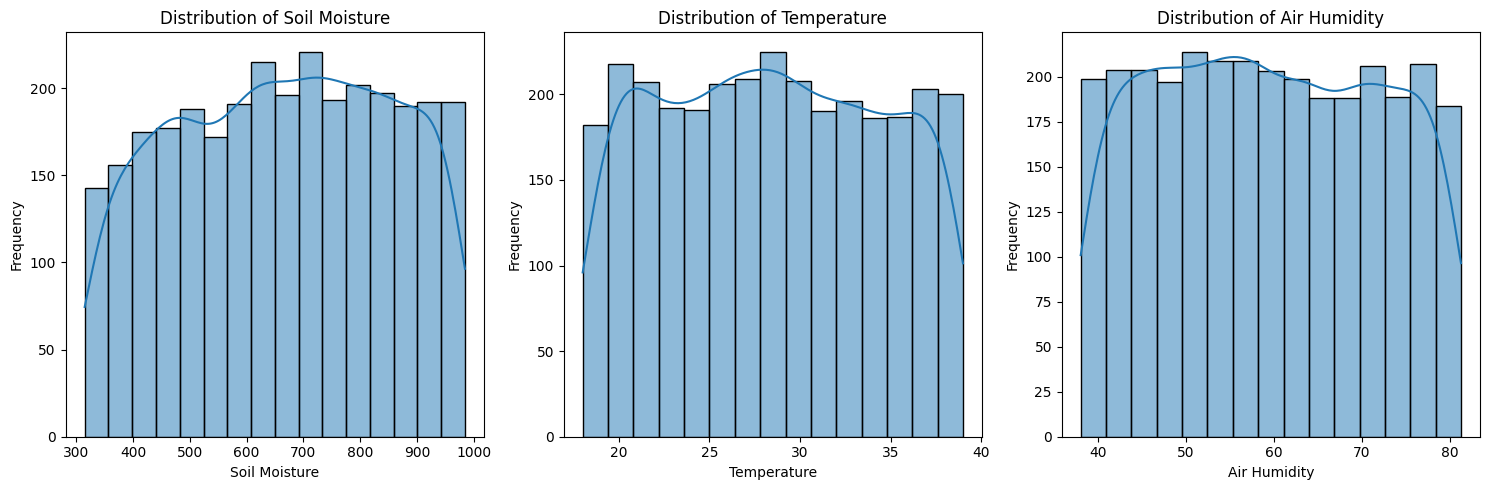

In [ ]:
# prompt: make histogram of my numerical columns

# Assuming 'data' DataFrame from the previous code is available

numerical_cols = ['Soil Moisture', 'Temperature', 'Air Humidity']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Create synthetic samples
synthetic_data = pd.DataFrame({
    'Soil Moisture': np.random.randint(200, 299, 20),  # Generating values between 200-299
    'Temperature': np.random.randint(15, 40, 20),  # Random realistic temperatures
    'Air Humidity': np.random.randint(30, 80, 20)   # Random realistic humidity
})

# Add to your dataset
data = pd.concat([data, synthetic_data], ignore_index=True)


In [ ]:
# Define a function to categorize moisture levels with temp & humidity
def categorize_irrigation(moisture, temperature, humidity):
    if moisture < 300:
        if temperature > 30 or humidity < 40:
            return "Very Dry (Immediate Irrigation Needed)"
        return "Very Dry (Irrigation Needed)"

    elif 300 <= moisture <= 500:
        if temperature > 30 and humidity < 40:
            return "Moderate (Irrigation Highly Recommended)"
        elif temperature < 15 and humidity > 70:
            return "Moderate (Irrigation Not Urgent)"
        return "Moderate (Irrigation Recommended)"

    else:
        if temperature > 35 and humidity < 30:
            return "Sufficient Moisture (Monitor Closely - Might Need Soon)"
        return "Sufficient Moisture (No Irrigation Needed)"

# Apply the function to create the new column
data['Irrigation Advice'] = data.apply(lambda row: categorize_irrigation(row['Soil Moisture'], row['Temperature'], row['Air Humidity']), axis=1)

data.head()


,Soil Moisture,Temperature,Air Humidity,Irrigation Need,Irrigation Advice
0,683.802906,29.184908,71.789699,0.0,Sufficient Moisture (No Irrigation Needed)
1,408.571567,33.707205,77.977391,1.0,Moderate (Irrigation Recommended)
2,659.092074,24.760311,60.776282,1.0,Sufficient Moisture (No Irrigation Needed)
3,842.929764,32.738515,59.323543,0.0,Sufficient Moisture (No Irrigation Needed)
4,414.199320,25.692744,66.624914,1.0,Moderate (Irrigation Recommended)


In [ ]:
data2=data.copy()

we have to scale our dataset columns to get best accuracy

In [ ]:
# Numerical features to scale
numerical_cols = ['Soil Moisture', 'Temperature', 'Air Humidity']

scaler = StandardScaler()

# Fit and transform the numerical features
data2[numerical_cols] = scaler.fit_transform(data2[numerical_cols])

In [ ]:
data2.head()

,Soil Moisture,Temperature,Air Humidity,Irrigation Need,Irrigation Advice
0,0.126578,0.123727,0.999797,0.0,Sufficient Moisture (No Irrigation Needed)
1,-1.320756,0.874977,1.496867,1.0,Moderate (Irrigation Recommended)
2,-0.003366,-0.611293,0.115065,1.0,Sufficient Moisture (No Irrigation Needed)
3,0.963364,0.714057,-0.001637,0.0,Sufficient Moisture (No Irrigation Needed)
4,-1.291162,-0.456396,0.584898,1.0,Moderate (Irrigation Recommended)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Irrigation Advice' column
data2['Irrigation_label'] = label_encoder.fit_transform(data2['Irrigation Advice'])

data2.head()


,Soil Moisture,Temperature,Air Humidity,Irrigation Need,Irrigation Advice,Irrigation_label
0,0.126578,0.123727,0.999797,0.0,Sufficient Moisture (No Irrigation Needed),2
1,-1.320756,0.874977,1.496867,1.0,Moderate (Irrigation Recommended),1
2,-0.003366,-0.611293,0.115065,1.0,Sufficient Moisture (No Irrigation Needed),2
3,0.963364,0.714057,-0.001637,0.0,Sufficient Moisture (No Irrigation Needed),2
4,-1.291162,-0.456396,0.584898,1.0,Moderate (Irrigation Recommended),1


In [ ]:

unique_irrigation_advice = data2['Irrigation Advice'].unique()
unique_irrigation_advice


array(['Sufficient Moisture (No Irrigation Needed)',
       'Moderate (Irrigation Recommended)',
       'Moderate (Irrigation Highly Recommended)',
       'Very Dry (Irrigation Needed)',
       'Very Dry (Immediate Irrigation Needed)'], dtype=object)

Now we will train our data

In [ ]:

# Split the data into features (X) and target (y)
X = data2[['Soil Moisture', 'Temperature', 'Air Humidity']]
y = data2['Irrigation_label']


In [ ]:

from imblearn.over_sampling import SMOTE


# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
X.head(2)

,Soil Moisture,Temperature,Air Humidity
0,0.126578,0.123727,0.999797
1,-1.320756,0.874977,1.496867


In [ ]:
# Split data4 into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(9024, 3)

In [ ]:
X_test.shape

(2256, 3)

# Now we will integrate API to get Data From Weather app

In [ ]:
import requests
import pandas as pd

def get_weather_data(api_key, location):
    base_url = "https://api.weatherapi.com/v1/current.json"
    params = {
        "key": api_key,
        "q": location,
        "aqi": "no"  #  air quality data (yes/no)
    }

    try:
        # requesting
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise an exception for HTTP errors
        data = response.json()

        # extracting
        temperature = data["current"]["temp_c"]
        humidity = data["current"]["humidity"]
        wind_speed = data["current"]["wind_kph"] / 3.6
        rainfall = data["current"].get("precip_mm", 0)


        evaporation_rate = calculate_evaporation_rate(temperature, humidity, wind_speed)

        weather_data = {
            "Temperature (°C)": temperature,
            "Air Humidity (%)": humidity,
            "Wind Speed (m/s)": wind_speed,
            "Rainfall (mm)": rainfall,
            "Evaporation Rate": evaporation_rate
        }

        return weather_data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return None

#  evaporation rate
def calculate_evaporation_rate(temperature, humidity, wind_speed):
    # Formula
    return (temperature * (100 - humidity) * wind_speed) / 1000

# Test and preprocess data
def test_model(weather_data):
    # data in to dataframe
    df = pd.DataFrame([weather_data])

    print("Weather Data for Model Testing:")
    print(df)

if __name__ == "__main__":
    API_KEY = "f24552e0b4534d8c95293919252601"  # API key
    LOCATION = "Faisalabad, PK"  # City

    weather_data = get_weather_data(API_KEY, LOCATION)

    if weather_data:
        print("Fetched Weather Data:", weather_data)
        test_model(weather_data)


Fetched Weather Data: {'Temperature (°C)': 22.4, 'Air Humidity (%)': 29, 'Wind Speed (m/s)': 4.805555555555555, 'Rainfall (mm)': 0.0, 'Evaporation Rate': 7.642755555555555}
Weather Data for Model Testing:
   Temperature (°C)  Air Humidity (%)  Wind Speed (m/s)  Rainfall (mm)  \
0              22.4                29          4.805556            0.0   

   Evaporation Rate  
0          7.642756  


NODE

**Transformer-based Tabular Learning (TTLL)**

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn  # Ensure nn is imported
import torch.optim as optim

In [ ]:
# Convert to Tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 64)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=4), num_layers=2
        )
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)  # Add sequence dimension
        x = self.transformer(x).squeeze(1)  # Remove sequence dimension
        x = self.fc(x)
        return x

In [ ]:

# Initialize Model
model = TransformerModel(input_dim=3, num_classes=5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training Loop
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

In [ ]:

# Train the Model
train_model(model, train_loader, criterion, optimizer, epochs=30)

Epoch 1/30, Loss: 0.2109
Epoch 2/30, Loss: 0.0753
Epoch 3/30, Loss: 0.0450
Epoch 4/30, Loss: 0.0496
Epoch 5/30, Loss: 0.0443
Epoch 6/30, Loss: 0.0283
Epoch 7/30, Loss: 0.0350
Epoch 8/30, Loss: 0.0213
Epoch 9/30, Loss: 0.0450
Epoch 10/30, Loss: 0.0356
Epoch 11/30, Loss: 0.0226
Epoch 12/30, Loss: 0.0149
Epoch 13/30, Loss: 0.0370
Epoch 14/30, Loss: 0.0160
Epoch 15/30, Loss: 0.0212
Epoch 16/30, Loss: 0.0165
Epoch 17/30, Loss: 0.0270
Epoch 18/30, Loss: 0.0154
Epoch 19/30, Loss: 0.0185
Epoch 20/30, Loss: 0.0259
Epoch 21/30, Loss: 0.0115
Epoch 22/30, Loss: 0.0136
Epoch 23/30, Loss: 0.0230
Epoch 24/30, Loss: 0.0116
Epoch 25/30, Loss: 0.0244
Epoch 26/30, Loss: 0.0125
Epoch 27/30, Loss: 0.0109
Epoch 28/30, Loss: 0.0157
Epoch 29/30, Loss: 0.0263
Epoch 30/30, Loss: 0.0137


In [ ]:
# Evaluation
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [ ]:

# Evaluate the Model
evaluate_model(model, test_loader)

Test Accuracy: 99.69%


In [ ]:
# prompt: give me f1 score precision and accuray

from sklearn.metrics import classification_report

# Assuming 'model', 'X_test_tensor', and 'y_test_tensor' are defined from the previous code

# Make predictions on the test set
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test_tensor)
    _, y_pred = torch.max(y_pred_prob, 1)

# Convert predictions and true labels to NumPy arrays
y_pred = y_pred.numpy()
y_test = y_test_tensor.numpy()


# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract the desired metrics
accuracy = report['accuracy']
precision = report['macro avg']['precision']  # Macro average for multi-class
f1_score = report['macro avg']['f1-score'] # Macro average for multi-class

print(f"Accuracy: {accuracy}")
print(f"Precision (Macro Avg): {precision}")
print(f"F1-score (Macro Avg): {f1_score}")


Accuracy: 0.9968971631205674
Precision (Macro Avg): 0.9969954407725201
F1-score (Macro Avg): 0.9969577604360212


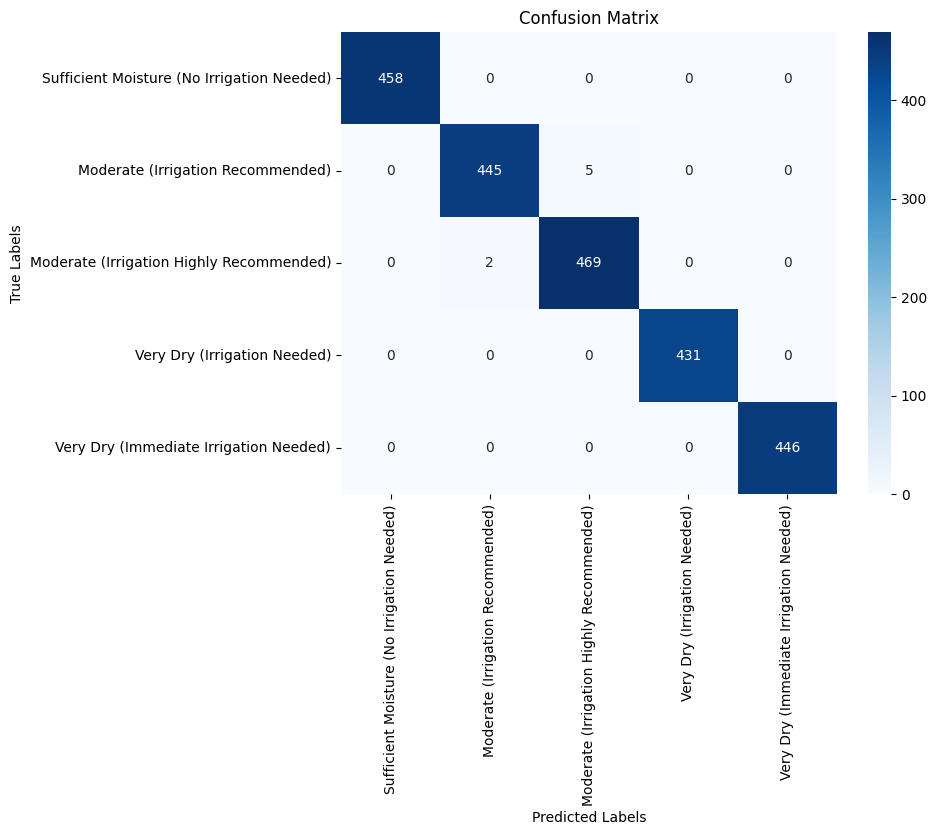

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Updated class names based on your labels
class_names = [
    'Sufficient Moisture (No Irrigation Needed)',
    'Moderate (Irrigation Recommended)',
    'Moderate (Irrigation Highly Recommended)',
    'Very Dry (Irrigation Needed)',
    'Very Dry (Immediate Irrigation Needed)'
]

plot_confusion_matrix(model, test_loader, class_names)


In [ ]:
# Save the scaler
joblib.dump(scaler, "scaler1.pkl")
print("Scaler saved successfully!")

Scaler saved successfully!


In [ ]:
# Save the trained model
torch.save(model.state_dict(), "irrigation_model.pth1")
print("Model saved successfully!")


Model saved successfully!


In [ ]:


import joblib


In [ ]:
# prompt: use my model to predict and use irrigation advice column to show the name of label

# Load and Use Model for Prediction
def load_model_and_predict(soil_moisture, temperature, air_humidity):
    scaler = joblib.load("/content/scaler1.pkl")
    model = TransformerModel(input_dim=3, num_classes=len(unique_irrigation_advice)) # Use the correct number of classes
    model.load_state_dict(torch.load("/content/irrigation_model.pth1"))
    model.eval()

    input_data = torch.tensor(scaler.transform([[soil_moisture, temperature, air_humidity]]), dtype=torch.float32)
    with torch.no_grad():
        output = model(input_data)
        _, predicted = torch.max(output, 1)

    # Use inverse transform to get the original label name
    predicted_label = label_encoder.inverse_transform([predicted.item()])[0]
    return predicted_label

# Example Usage
soil_moisture = float(input("Enter Soil Moisture: "))
temperature = float(input("Enter Temperature: "))
air_humidity = float(input("Enter Air Humidity: "))

prediction = load_model_and_predict(soil_moisture, temperature, air_humidity)
print("Irrigation Advice:", prediction)


Enter Soil Moisture: 200
Enter Temperature: 15
Enter Air Humidity: 34
Irrigation Advice: Very Dry (Irrigation Needed)
